In [1]:
import numpy as np
import pandas as pd
import chart_studio
import chart_studio.plotly as py
import seaborn as sns
import os
import plotly 
import plotly.graph_objs as go
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# retriving the data of csv
store = pd.read_csv(r"C:\Users\Kajal\store.csv")
train = pd.read_csv(r"C:\Users\Kajal\train.csv" , parse_dates = True , index_col = 'Date' )
print("# of observations & # of features", train.shape)
train.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [3]:
print("# of observations & # of features", store.shape)
store.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
print("train:\n\n", train.isnull().sum())

train:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [5]:
print("\n\nstore:\n\n", store.isnull().sum())



store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [6]:
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

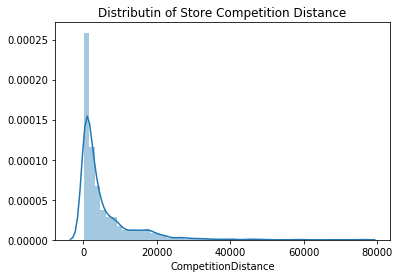

In [7]:
#store.head()
import matplotlib.pyplot as plt
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [8]:
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)
store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


In [9]:
#store.CompetitionDistance.isna()

In [10]:
# Data Extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train = train.reset_index()

In [11]:
#train.head()
st = pd.merge(train, store, how='left', on='Store')
st.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [12]:
#len(st)
st = st[st.Open != 0]
st = st.drop('Open', axis=1)
st.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0


In [13]:
st[st.Sales == 0]['Store'].sum()

31460

In [14]:
st[st.Sales == 0]['Sales'].sum()/st.Sales.sum()

0.0

In [15]:
st = st[st.Sales != 0]

In [16]:
st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

In [17]:
set(st.StateHoliday), set(st.StoreType), set(st.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [18]:
st.loc[st.StateHoliday == 0,'StateHoliday'] = st.loc[st.StateHoliday == 0,'StateHoliday'].astype(str)

In [19]:
st1 = st.copy()

In [20]:
# calculate weekly average sales
sales = st1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [21]:
sales.head()

,Year,Month,Store,AvgSales
0,2013,1,1,4939.653846
1,2013,1,2,4429.653846
2,2013,1,3,6371.269231
3,2013,1,4,9027.423077
4,2013,1,5,4209.307692


In [22]:
st1['sales_key']=st1['Year'].map(str) + st1['Month'].map(str) + st1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [23]:
sales = sales.drop(['Year','Month','Store'], axis=1)
st1 = pd.merge(st1, sales, how='left', on=('sales_key'))

In [24]:
# calculate weekly average
cust = st1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [25]:
#cust.head()
st1['cust_key']=st1['Year'].map(str) + st1['Month'].map(str) + st1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [26]:
st1 = st1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [27]:
st1 = pd.merge(st1, cust, how="left", on=('cust_key'))

In [28]:
#st1.head()

In [29]:
st1['StateHoliday'] = st1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [30]:
st1 = st1.drop(['cust_key','sales_key','Store','Date'], axis=1)

In [31]:
#st1.head()
stv = st.sample(n=5000, random_state=1)

In [32]:
chart_studio.tools.set_credentials_file(username = 'RossMann' , api_key = 'qckEBrC4bvU40C2WeeGg')

In [33]:
corr = st1.corr()
corr.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,AvgSales,AvgCustomer
DayOfWeek,1.000000,-0.178733,-0.286350,-0.002101,-0.135893,0.002316,-0.020707,0.006419,-0.011978,0.004975,-0.003150,0.001605,0.014897
Sales,-0.178733,1.000000,0.369741,0.019434,0.036777,0.036711,0.087562,-0.055308,0.088965,-0.032779,-0.125413,0.774885,0.644470
Promo,-0.286350,0.369741,1.000000,0.001268,0.017027,0.026754,0.000732,-0.132124,0.016307,-0.001701,-0.000708,0.001422,-0.005552
StateHoliday,-0.002101,0.019434,0.001268,1.000000,0.014592,0.002879,0.000827,-0.008347,0.000885,0.009299,-0.010480,0.019200,0.053578
SchoolHoliday,-0.135893,0.036777,0.017027,0.014592,1.000000,-0.031159,0.103183,0.029469,0.056861,-0.004064,-0.007698,-0.002353,-0.001876


Text(0.5, 1, 'Correlation Heatmap')

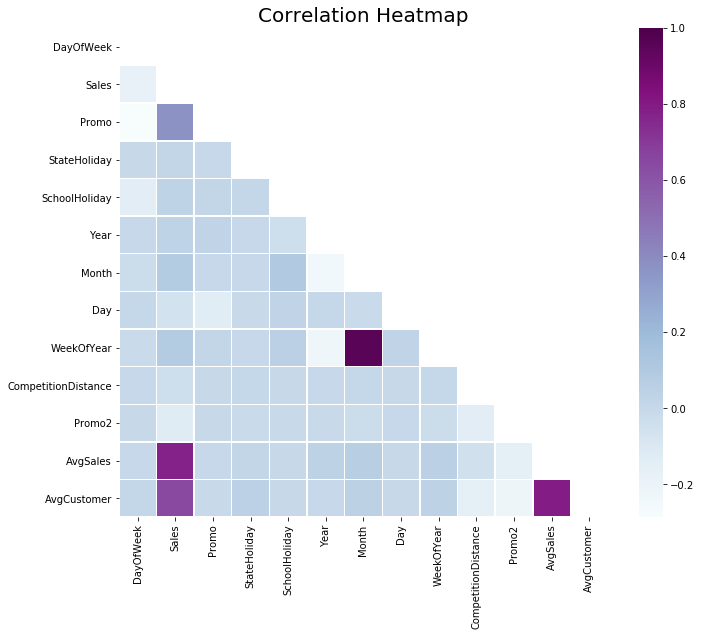

In [34]:
mask = np.zeros_like(corr , dtype = np.bool)
#print(mask)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

Text(0.5, 1.0, 'Sales Distribution')

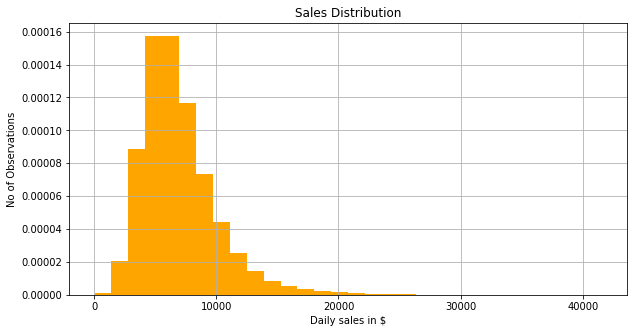

In [35]:
#sales distribution graph 
#np.random.seed(42)
plt.figure(figsize = (10,5))
plt.hist(x = st1.Sales , density = True , bins =30 , color = 'orange')
plt.grid(True)
plt.xlabel ('Daily sales in $')
plt.ylabel ('No of Observations')
plt.title('Sales Distribution')

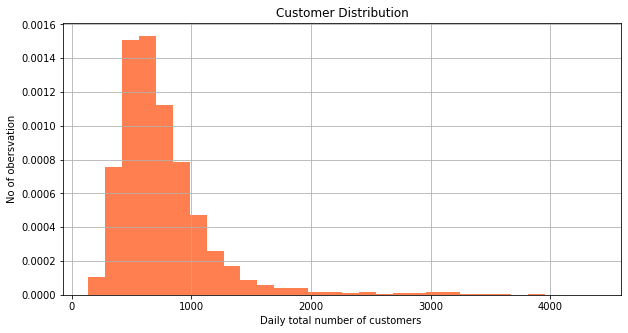

In [36]:
plt.figure(figsize =(10,5))
plt.hist(x = stv.Customers , density = True , bins = 30 , facecolor ='coral' )
plt.xlabel('Daily total number of customers ')
plt.ylabel("No of obersvation")
plt.title('Customer Distribution')
plt.grid(True)

In [37]:
st1_2015 = st.query('Store == 1 and Year == 2015 ')
st2_2014 = st.query ('Store == 1 and Year == 2014')
st3_2013 = st.query ('Store == 1 and Year == 2013')

Text(0.5, 1.0, 'Sales Over Time')

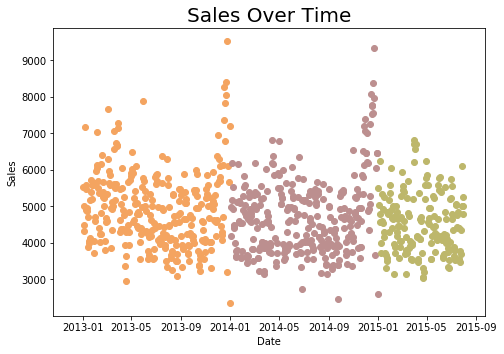

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x = st3_2013.Date , y = st3_2013.Sales , color = 'sandybrown')
ax.scatter(x = st2_2014.Date , y = st2_2014.Sales , color = 'rosybrown')
ax.scatter(x = st1_2015.Date , y = st1_2015.Sales , color = 'darkkhaki')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Over Time' , fontsize = 20)

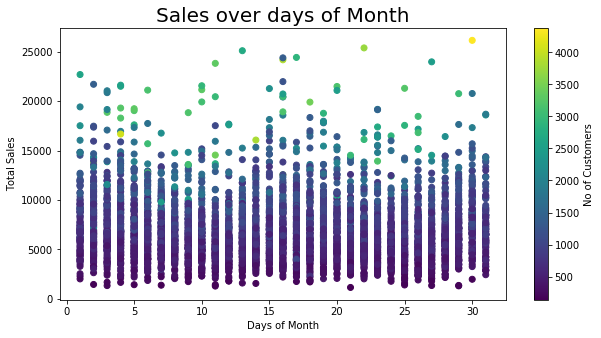

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(x = stv.Day , y = stv.Sales , c = stv.Customers)
plt.ylabel('Total Sales')
plt.xlabel('Days of Month')
plt.title('Sales over days of Month' , fontsize = 20)
cbr = plt.colorbar()
cbr.set_label('No of Customers')

Text(0.5, 1.0, 'Sales over days of Year')

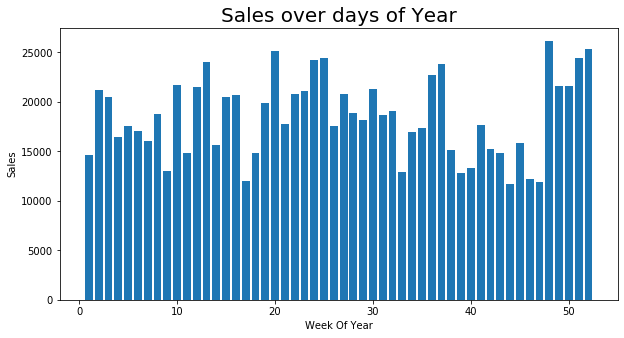

In [40]:
plt.figure(figsize=(10,5))
plt.bar(x = stv.WeekOfYear, height = stv.Sales)
plt.ylabel('Sales')
plt.xlabel('Week Of Year')
plt.title('Sales over days of Year', fontsize = 20)

Text(0.5, 1.0, 'Sales over days of Week')

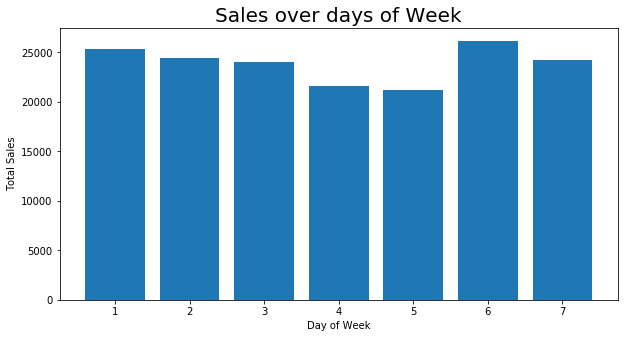

In [41]:
plt.figure(figsize=(10,5))
plt.bar(x = stv.DayOfWeek, height = stv.Sales)
plt.ylabel('Total Sales')
plt.xlabel('Day of Week')
plt.title('Sales over days of Week' , fontsize = 20)

<Figure size 720x360 with 0 Axes>

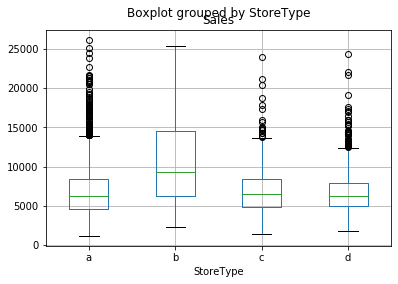

In [42]:
plt.figure(figsize=(10,5))
stv.boxplot(by = 'StoreType' , column = ['Sales'] , grid = True)

<Figure size 720x360 with 0 Axes>

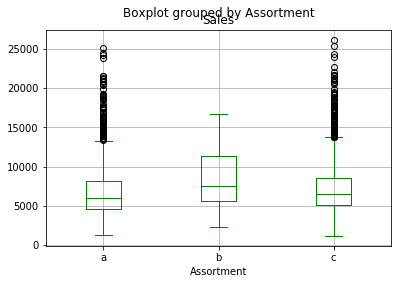

In [43]:
plt.figure(figsize=(10,5))
stv.boxplot(by = 'Assortment' , column = ['Sales'] , grid = True , color = 'green')

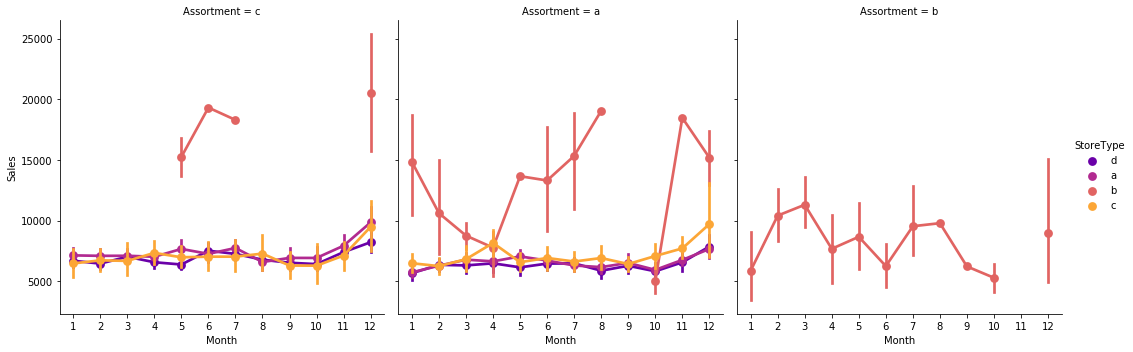

In [44]:
sns.factorplot(data = stv , x = 'Month' , y = 'Sales' , col = 'Assortment' , palette = 'plasma' , hue = 'StoreType' )

Text(0.5, 1.0, 'Sales Vs No of Customers')

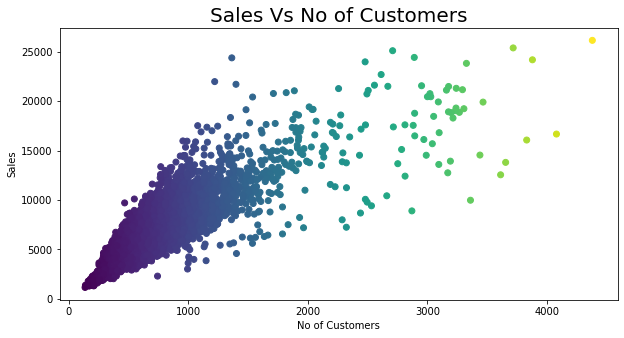

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(x = stv.Customers , y = stv.Sales , c = stv.Customers)
plt.ylabel('Sales')
plt.xlabel('No of Customers')
plt.title('Sales Vs No of Customers' , fontsize = 20)

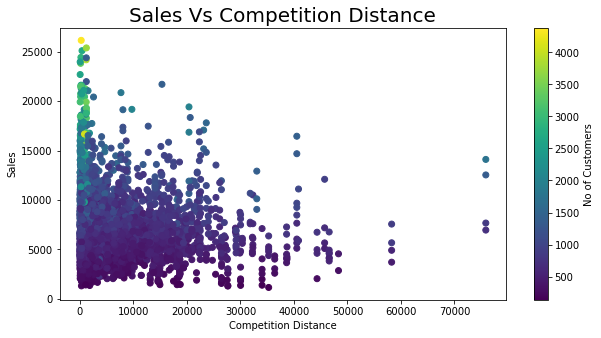

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(x = stv.CompetitionDistance , y = stv.Sales , c = stv.Customers)
plt.ylabel('Sales')
plt.xlabel('Competition Distance')
plt.title('Sales Vs Competition Distance' , fontsize = 20)
cbr = plt.colorbar()
cbr.set_label('No of Customers')

<Figure size 720x360 with 0 Axes>

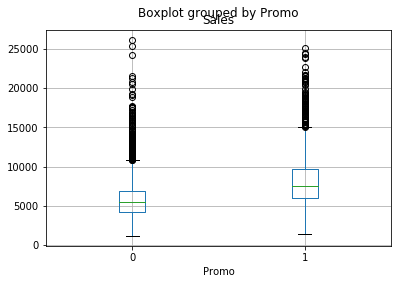

In [47]:
plt.figure(figsize=(10,5))
stv.boxplot(by = 'Promo' , column = ['Sales'] , grid = True )

In [48]:
promo0 = stv.query('Promo == 0')
promo0 = promo0.rename(columns = {'Sales' : 'Non_Promotional_Sales'})
promo1 = stv.query('Promo == 1')
promo1 = promo1.rename(columns = {'Sales' : 'Promotional_Sales'})
x1 = promo0.Non_Promotional_Sales
x2 =promo1.Promotional_Sales

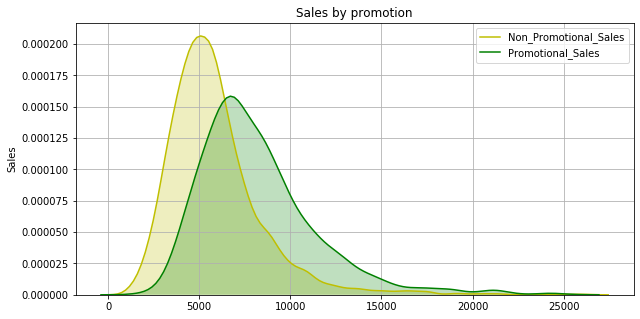

In [49]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(x1 , shade =True , color = 'y' )
ax = sns.kdeplot(x2 , shade = True , color = 'g')
plt.title('Sales by promotion')
plt.ylabel('Sales')
plt.grid(True)

<Figure size 432x288 with 0 Axes>

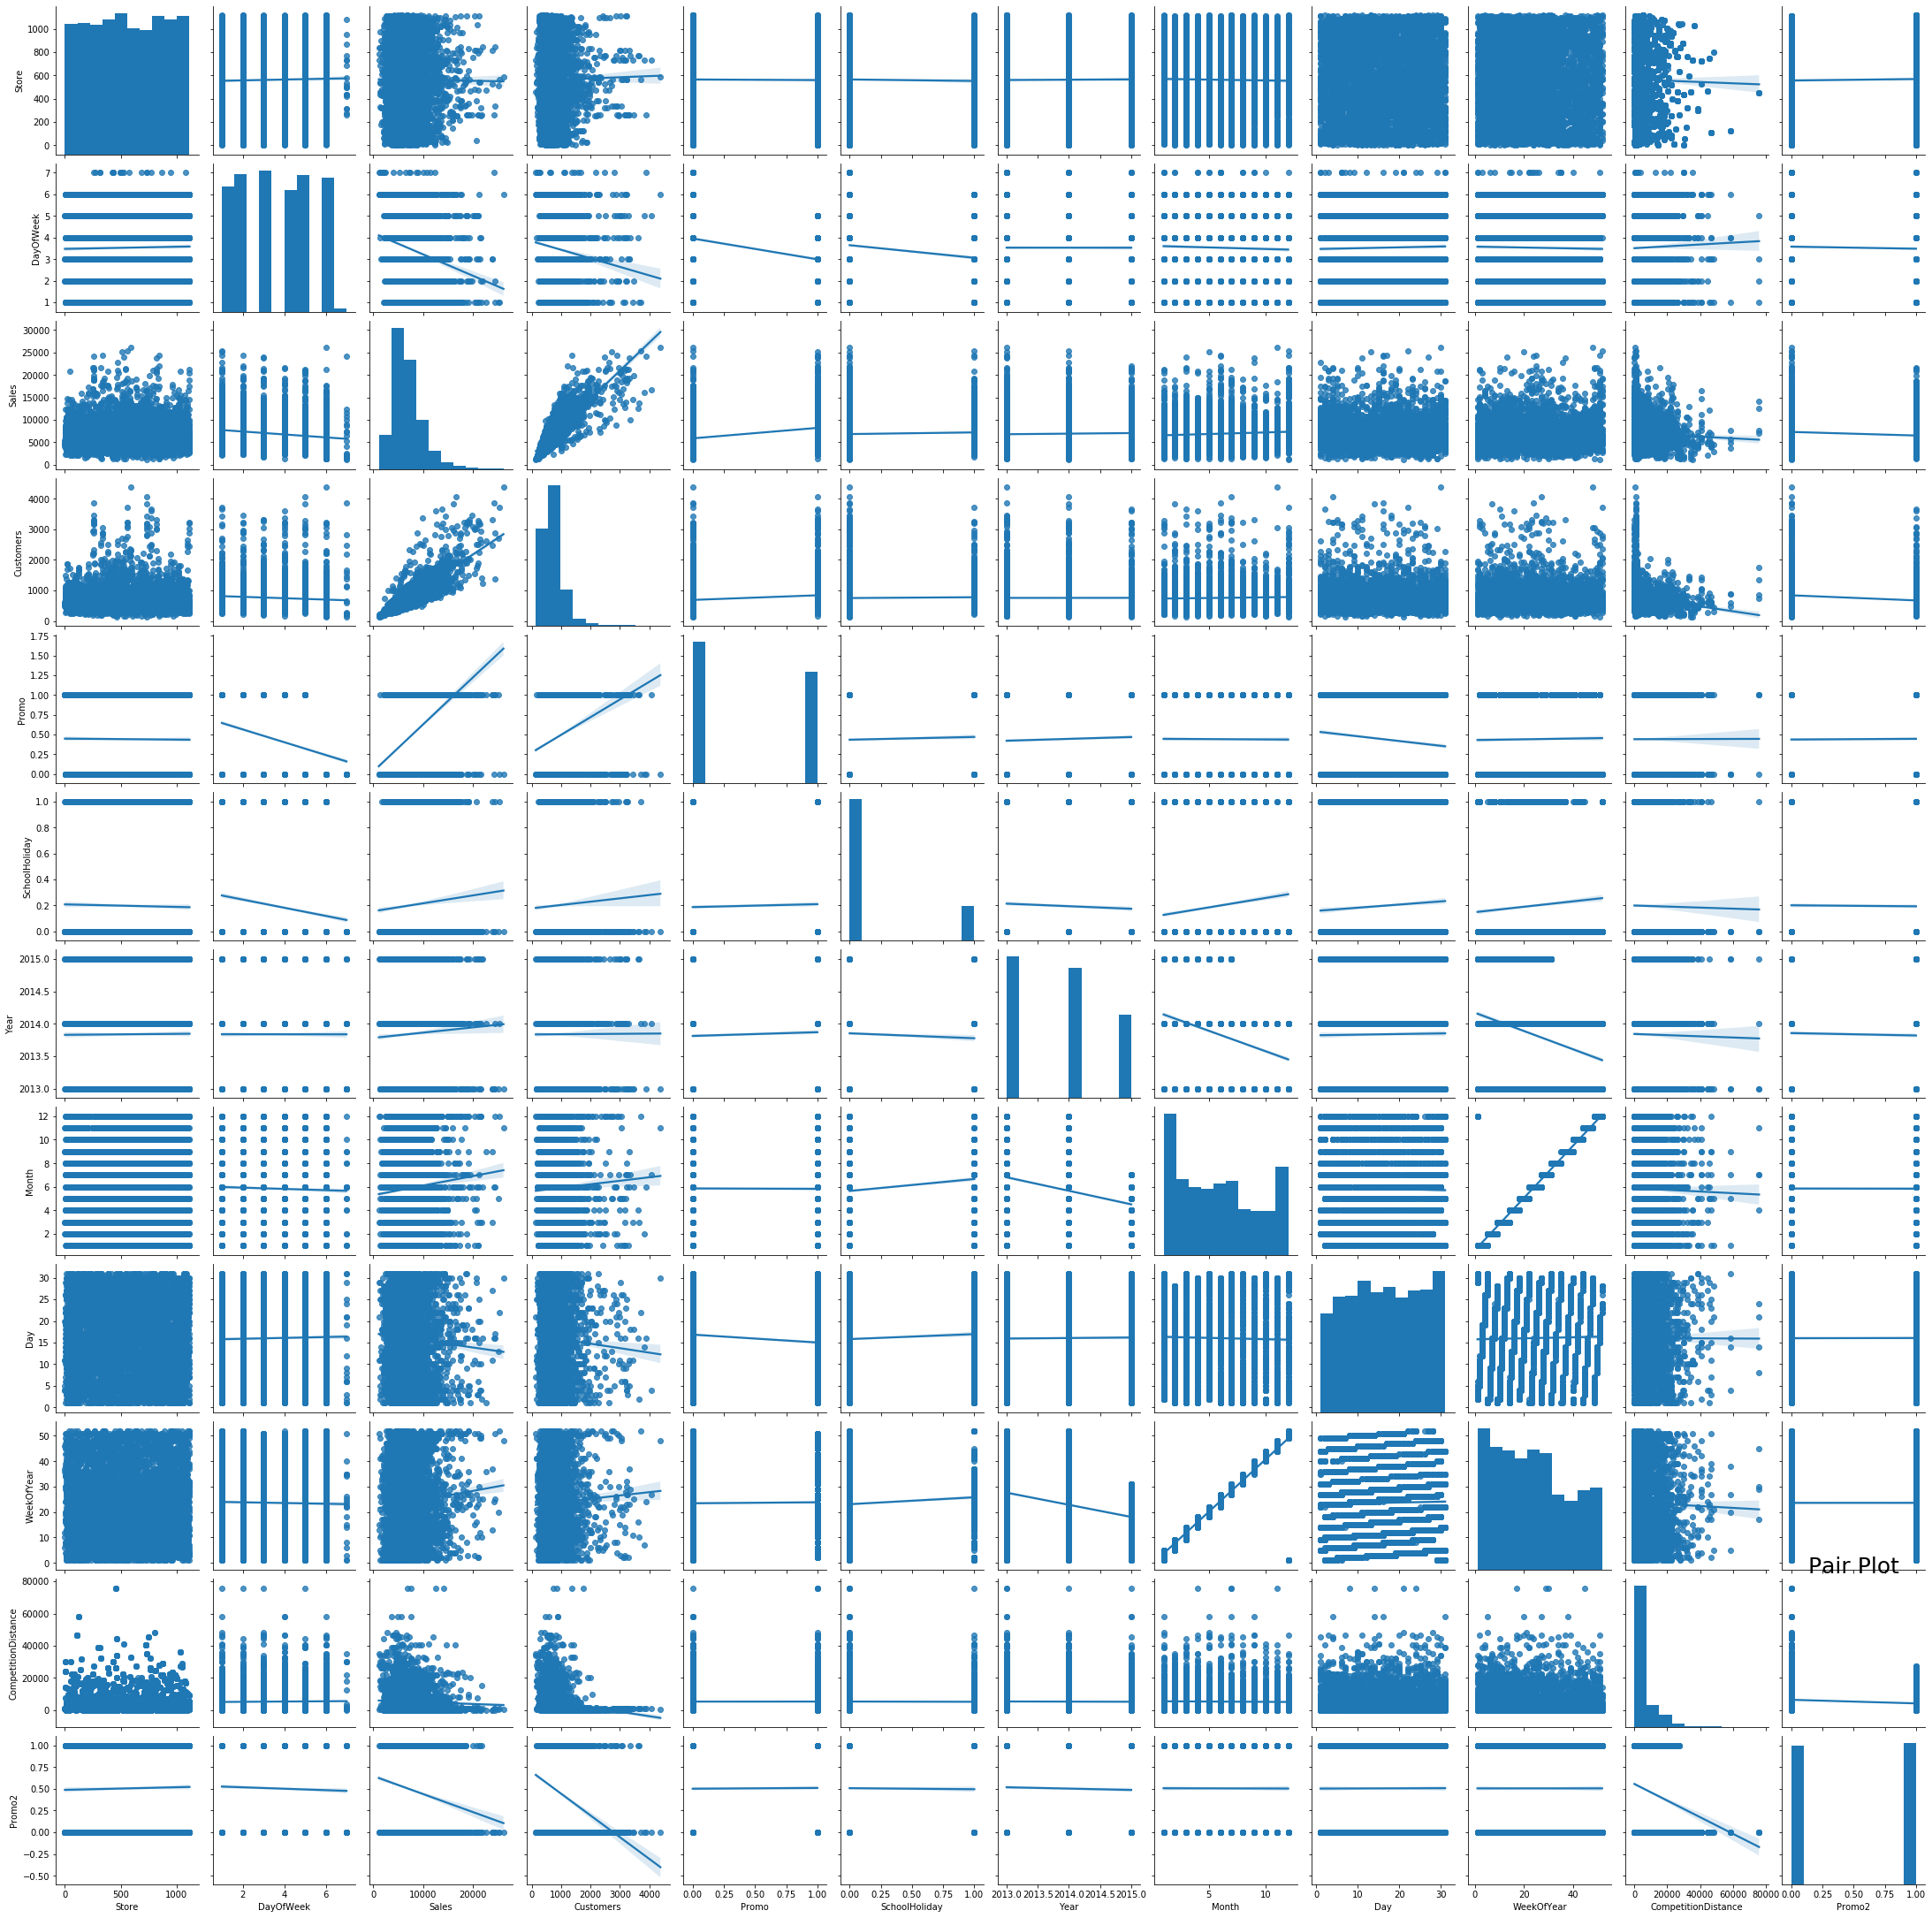

In [50]:
plt.figure()
sns.pairplot(stv , kind = 'reg')
plt.title('Pair Plot' , fontsize = 25)
plt.show()

In [51]:
print('Machine Learning \n Linear Regression')
st1.head()

Machine Learning 
 Linear Regression


,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,5,6064,1,0,1,2015,7,31,31,a,a,570.0,1,4954.259259,621.222222
2,5,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,6797.592593,682.888889
3,5,13995,1,0,1,2015,7,31,31,c,c,620.0,0,10256.851852,1294.259259
4,5,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,4599.629630,521.703704


In [52]:
X = st1.drop('Sales' , axis = 1)
y = st1.Sales
X.head()

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,5,1,0,1,2015,7,31,31,a,a,570.0,1,4954.259259,621.222222
2,5,1,0,1,2015,7,31,31,a,a,14130.0,1,6797.592593,682.888889
3,5,1,0,1,2015,7,31,31,c,c,620.0,0,10256.851852,1294.259259
4,5,1,0,1,2015,7,31,31,a,a,29910.0,0,4599.629630,521.703704


In [53]:
xd = X.copy()
xd = pd.get_dummies(xd)

In [54]:
xd.head()

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,AvgSales,AvgCustomer,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,1,0,1,2015,7,31,31,1270.0,0,4491.333333,519.407407,0,0,1,0,1,0,0
1,5,1,0,1,2015,7,31,31,570.0,1,4954.259259,621.222222,1,0,0,0,1,0,0
2,5,1,0,1,2015,7,31,31,14130.0,1,6797.592593,682.888889,1,0,0,0,1,0,0
3,5,1,0,1,2015,7,31,31,620.0,0,10256.851852,1294.259259,0,0,1,0,0,0,1
4,5,1,0,1,2015,7,31,31,29910.0,0,4599.629630,521.703704,1,0,0,0,1,0,0


In [55]:
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.4, random_state=0)

#df = pd.DataFrame(yd_train)
#df.to_csv(index=False)
#compression_opts = dict(method = 'zip' , archive_name = 'out.csv')
#df.to_csv('out.zip' , index = False , compression = compression_opts)

In [56]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))





Regresion Model Score : 0.7496291738666316 , Out of Sample Test Score : 0.7469579127979911
Training RMSE : 1552.5735593968848 Testing RMSE : 1555.7392053764972
Training MAPE : 16.99288853166724 Testing MAPE : 17.064903229716286


In [58]:
z = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
z.StateHoliday = label.fit_transform(z.StateHoliday)
z.Assortment = label.fit_transform(z.Assortment)
z.StoreType = label.fit_transform(z.StoreType)

In [59]:
xl_train,xl_test,yl_train,yl_test = train_test_split(z,y,test_size=0.3, random_state=1)

In [60]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=10)
rdfreg = rdf.fit(xl_train, yl_train)

In [61]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.9842573711627532 , Out of Sample Test Score : 0.9130054927390803
Training RMSE : 388.6627124045841 Testing RMSE : 914.7723970108707
Training MAPE : 3.734349611685762 Testing MAPE : 9.395413987129965


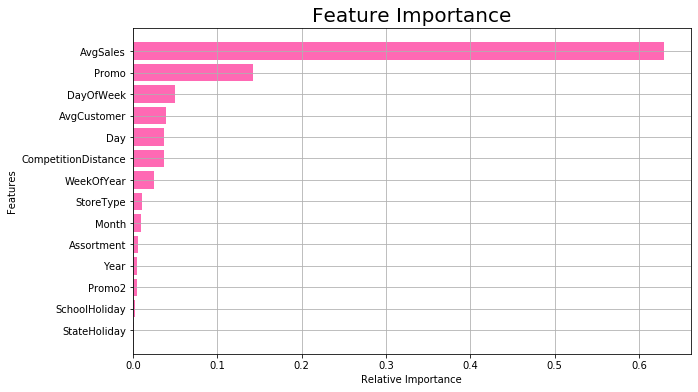

In [62]:
features = xl_train.columns
imp = rdfreg.feature_importances_
indices = np.argsort(imp)
plt.figure(figsize =(10,6))
plt.title('Feature Importance' , fontsize =20)
plt.barh(range(len(indices)) , imp[indices],color = 'hotpink' , align = 'center')
plt.yticks(range(len(indices)) , features[indices])
plt.ylabel('Features')
plt.xlabel('Relative Importance')
plt.grid(True)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [64]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))


Regresion Model Score : 0.6524830540245934 , Out of Sample Test Score : 0.6246992955762709
Training RMSE : 1829.1457742951843 Testing RMSE : 1894.6548480732433
Training MAPE : 22.030466288462488 Testing MAPE : 22.843850340198856


In [65]:
for x in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 1.0 , Out of Sample Test Score : 0.6474933693252644
Regresion Model Score : 0.9124957388330857 , Out of Sample Test Score : 0.6738642587944125
Regresion Model Score : 0.8558174129627617 , Out of Sample Test Score : 0.654988933079603
Regresion Model Score : 0.8074537574447423 , Out of Sample Test Score : 0.6305046218343373
Regresion Model Score : 0.7661210746885609 , Out of Sample Test Score : 0.6116717543473327
Regresion Model Score : 0.7332587315281955 , Out of Sample Test Score : 0.5996704879753836
Regresion Model Score : 0.7088888389971022 , Out of Sample Test Score : 0.5927066713295375
Regresion Model Score : 0.6912462761266187 , Out of Sample Test Score : 0.5896593844072082
Regresion Model Score : 0.6789068106839262 , Out of Sample Test Score : 0.5900888561809591
Regresion Model Score : 0.6711675120464007 , Out of Sample Test Score : 0.5930780574676395
Regresion Model Score : 0.6671065326830901 , Out of Sample Test Score : 0.5980299698529088
Regresion Model